In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("tab10")
from scipy import stats
from sklearn.model_selection import train_test_split
import os

In [2]:
def acquire():
    '''
    Obtains the vanilla version of both the red and white wine dataframe
    INPUT:
    NONE
    OUTPUT:
    red = pandas dataframe with red wine data
    white = pandas dataframe with white wine data
    '''
    red = pd.read_csv('https://query.data.world/s/k6viyg23e4usmgc2joiodhf2pvcvao?dws=00000')
    white = pd.read_csv('https://query.data.world/s/d5jg7efmkn3kq7cmrvvfkx2ww7epq7?dws=00000')
    return red, white

In [3]:
def prepare_mvp():
    '''
    Takes in the vanilla red and white wine dataframes and returns a cleaned version that is ready 
    for exploration and further analysis
    INPUT:
    NONE
    OUTPUT:
    wines = pandas dataframe with both red and white wine prepped for exploration
    '''
    red, white = acquire()
    white['is_red'] = 1
    red['is_red'] = 0
    wines = pd.concat([red, white], ignore_index = True)
    return wines

In [4]:
def wrangle():
    '''
    Function that acquires, prepares, and splits the wines dataframe for use as well as 
    creating a csv.
    INPUT:
    NONE
    OUTPUT:
    .csv = ONLY IF FILE NONEXISTANT
    wines = pandas dataframe with both red and white wine prepped for exploration
    '''
    if os.path.exists('wines.csv'):
        wines = pd.read_csv('wines.csv', index_col=0)
        train, validate, test = split(wines)
        return train, validate, test
    else:
        red, white = acquire()
        wines = pd.concat([red, white], ignore_index = True)
        wines.to_csv('wines.csv')
        train, validate, test = split(wines)
        return train, validate, test
    

In [5]:
def split(df):
    '''
    Takes a dataframe and splits the data into a train, validate and test datasets
    '''
    train_val, test = train_test_split(prepare_mvp(), train_size=0.8, random_state=1349)
    train, validate = train_test_split(train_val, train_size=0.7, random_state=1349)
    print(f"train.shape:{train.shape}\nvalidate.shape:{validate.shape}\ntest.shape:{test.shape}")
    return train, validate, test



In [6]:
acquire()

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [7]:
prepare_mvp()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [8]:
wines = prepare_mvp()

In [9]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [10]:
train, validate, test = wrangle()

train.shape:(3637, 13)
validate.shape:(1560, 13)
test.shape:(1300, 13)


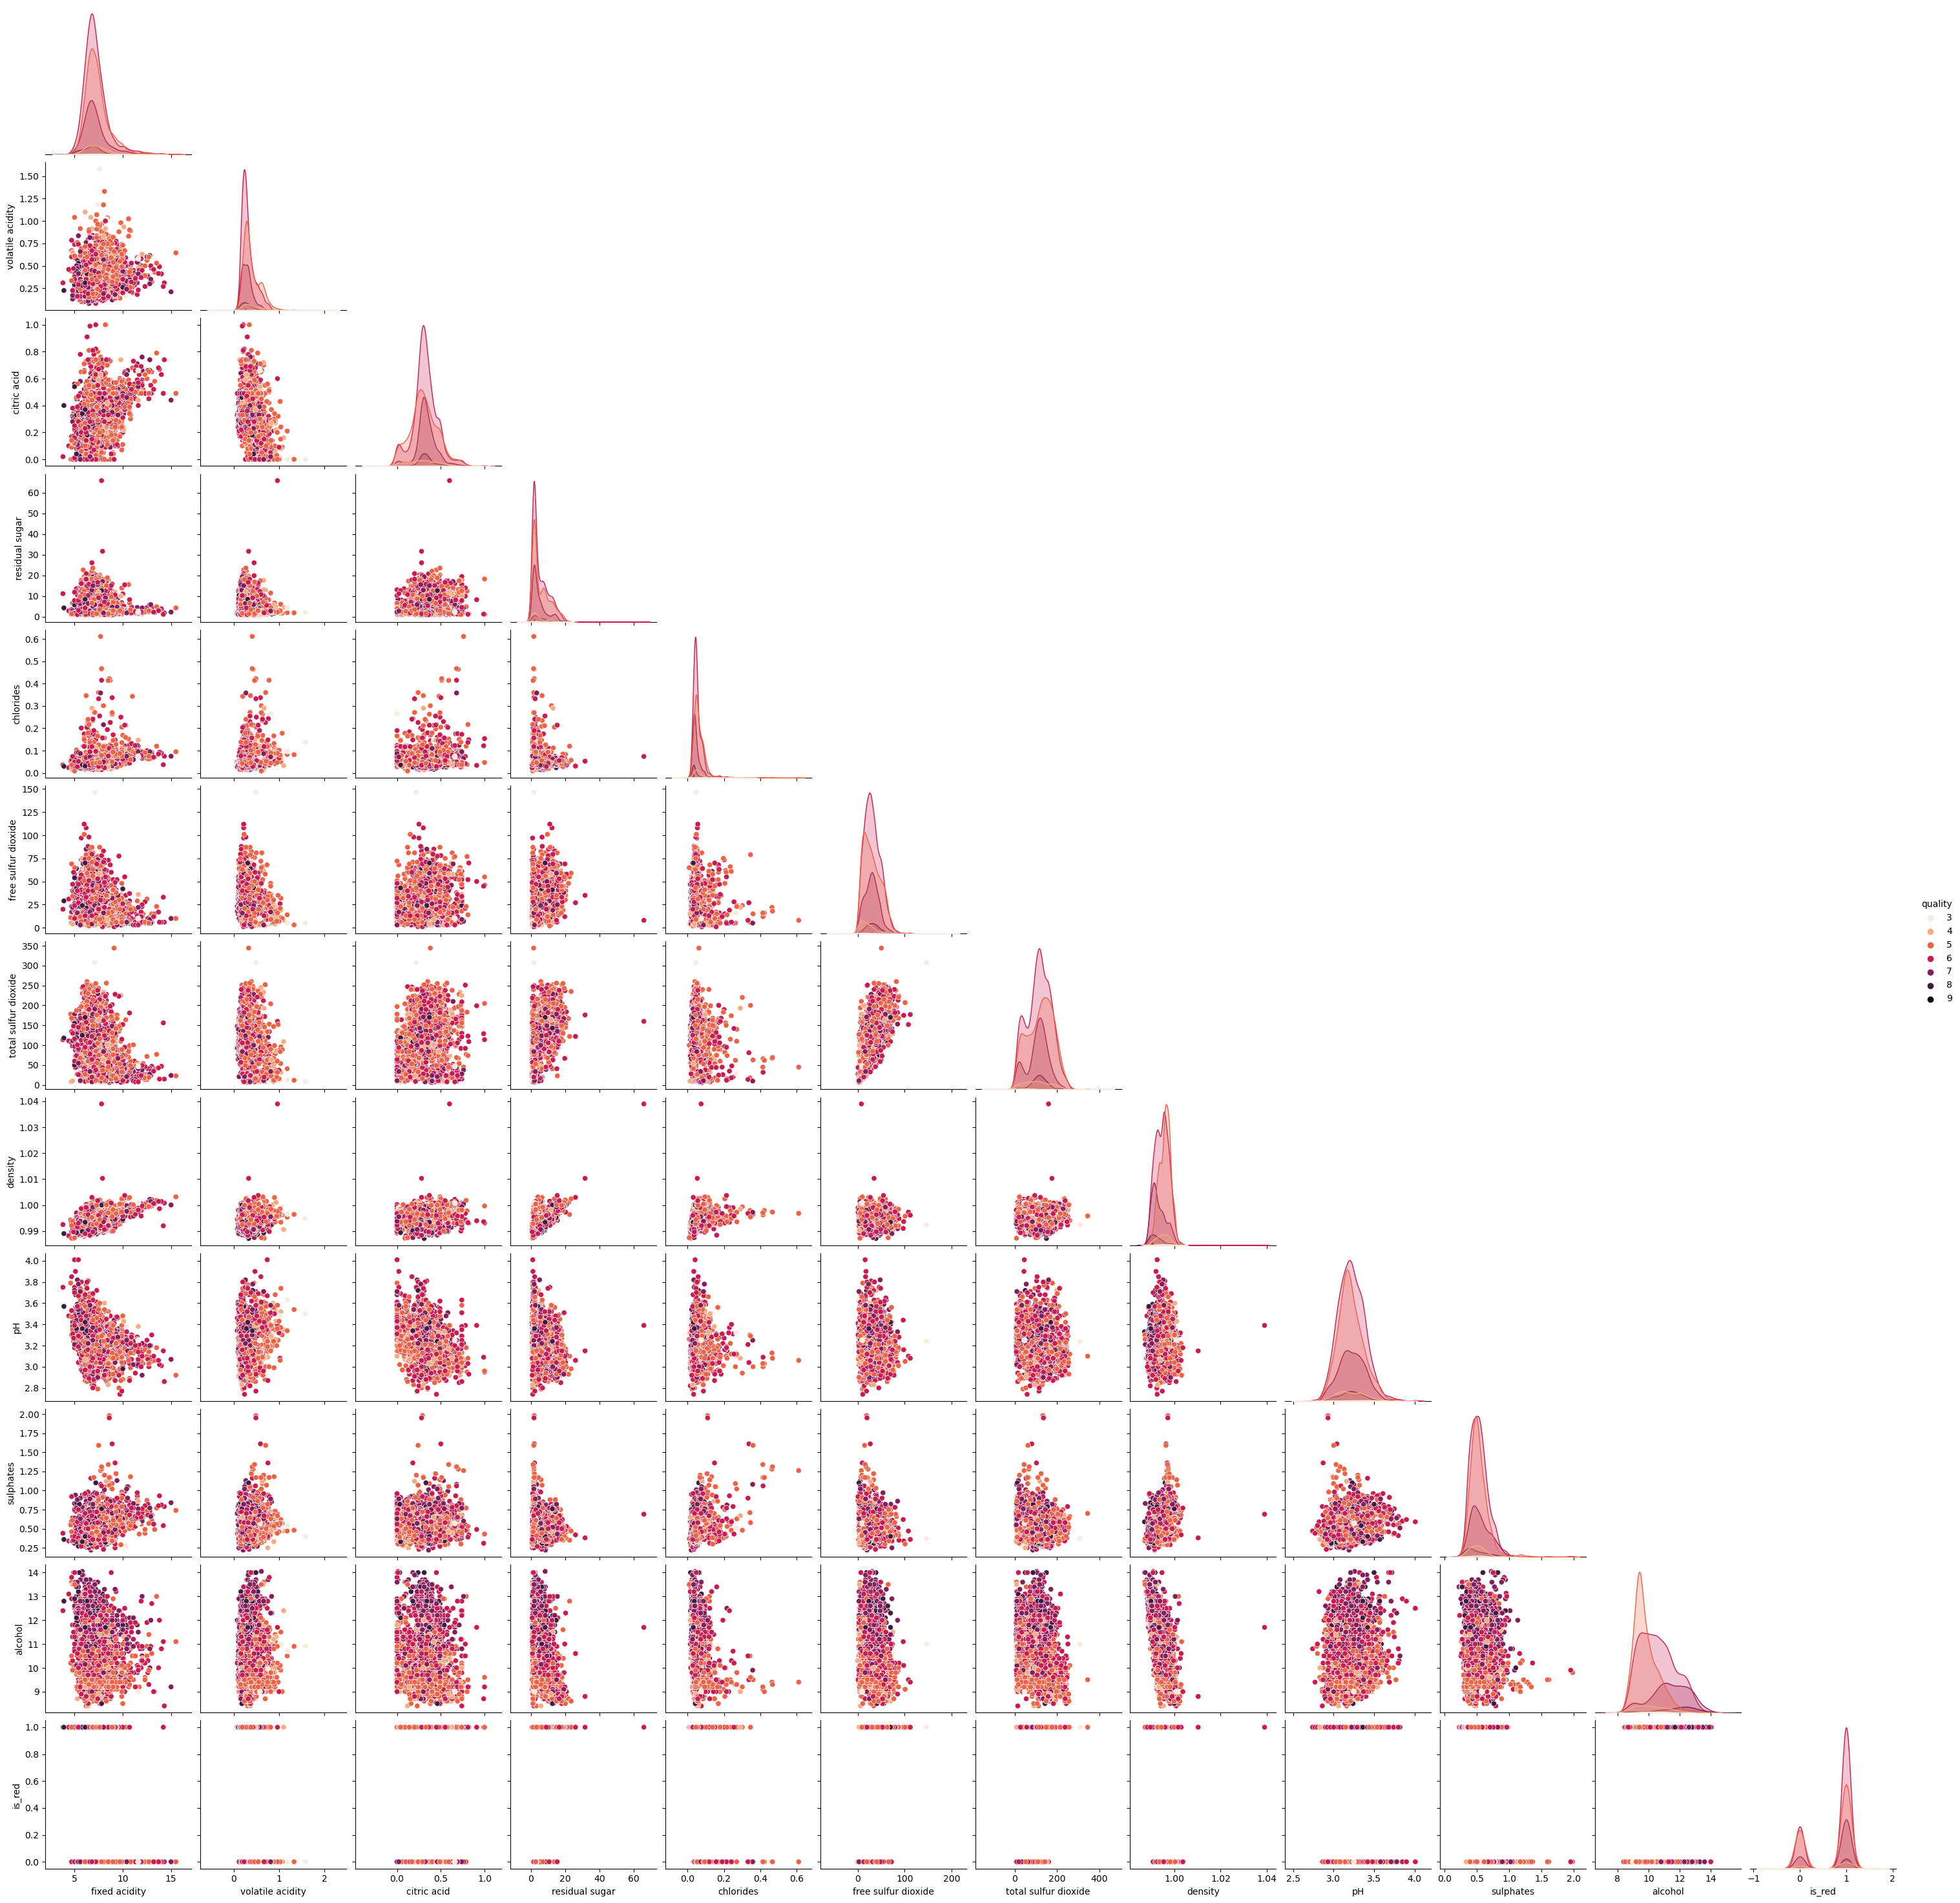

In [11]:
sns.pairplot(train, corner=True, hue = 'quality', palette='rocket_r')

plt.show()

In [12]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'is_red'],
      dtype='object')

In [13]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'is_red']

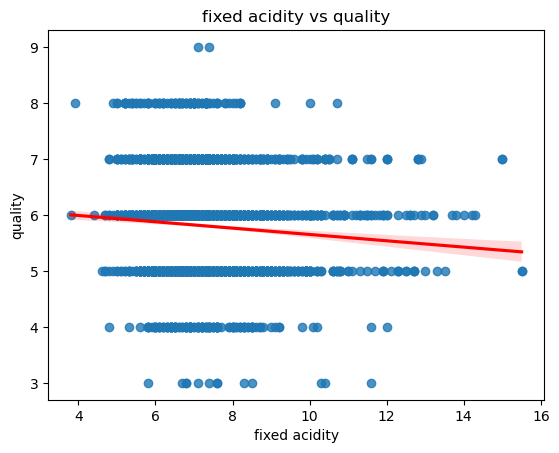

REJECT NULL HYPOTHESIS!
Feature: fixed acidity
Correlation: -0.0970
P-Value: 0.0000


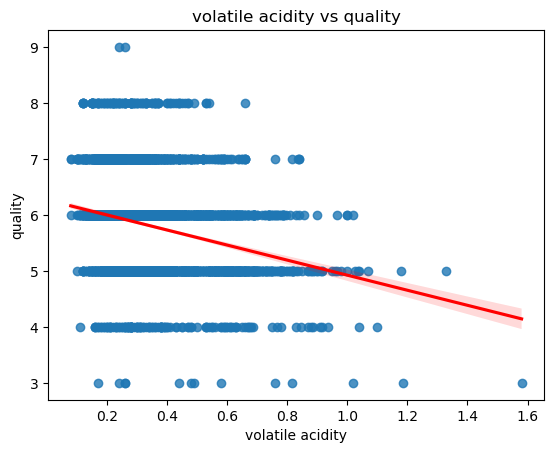

REJECT NULL HYPOTHESIS!
Feature: volatile acidity
Correlation: -0.2490
P-Value: 0.0000


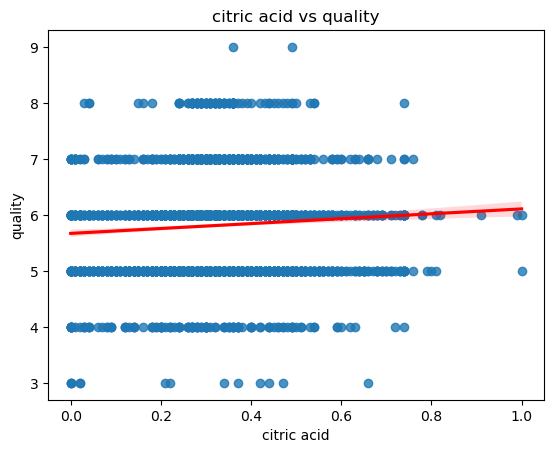

REJECT NULL HYPOTHESIS!
Feature: citric acid
Correlation: 0.0927
P-Value: 0.0000


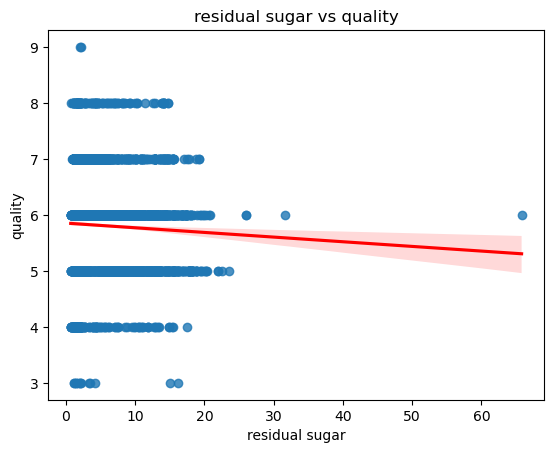

ACCEPT NULL HYPOTHESIS!
Feature: residual sugar
Correlation: -0.0278
P-Value: 0.0933


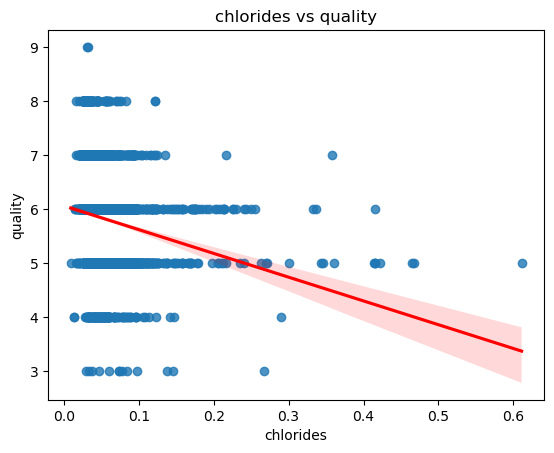

REJECT NULL HYPOTHESIS!
Feature: chlorides
Correlation: -0.2799
P-Value: 0.0000


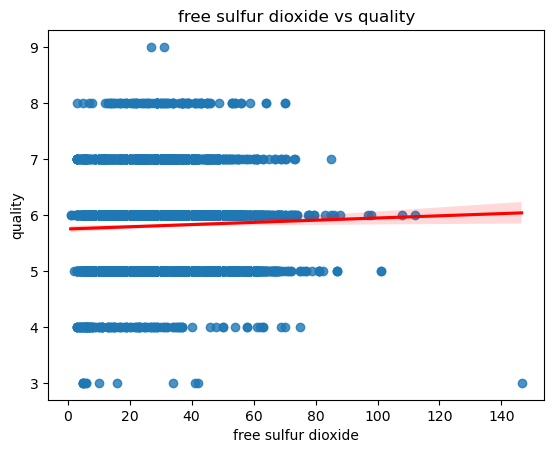

REJECT NULL HYPOTHESIS!
Feature: free sulfur dioxide
Correlation: 0.0600
P-Value: 0.0003


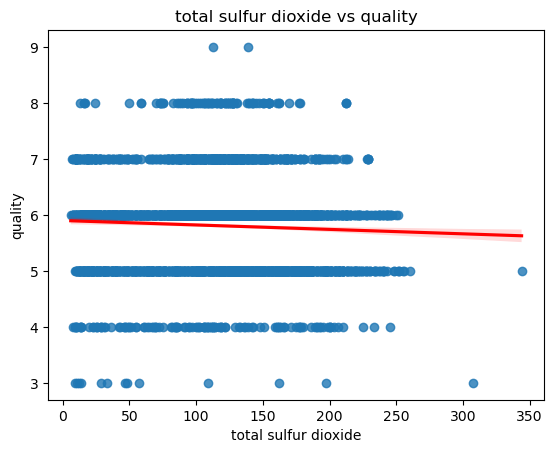

REJECT NULL HYPOTHESIS!
Feature: total sulfur dioxide
Correlation: -0.0703
P-Value: 0.0000


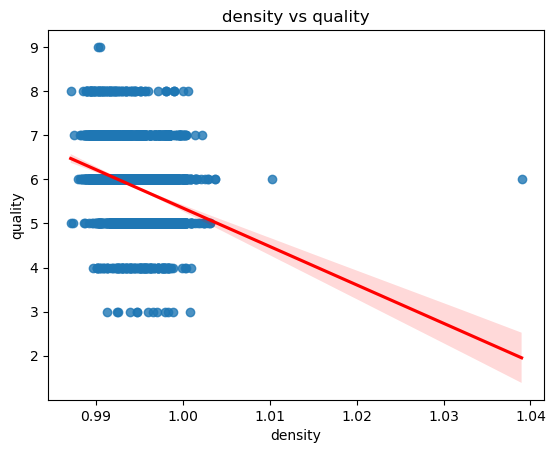

REJECT NULL HYPOTHESIS!
Feature: density
Correlation: -0.3246
P-Value: 0.0000


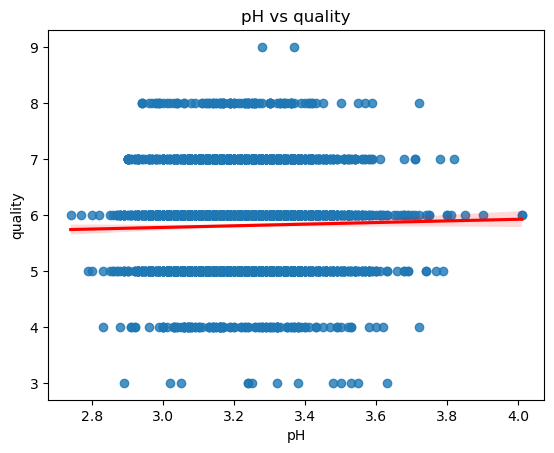

REJECT NULL HYPOTHESIS!
Feature: pH
Correlation: 0.0414
P-Value: 0.0125


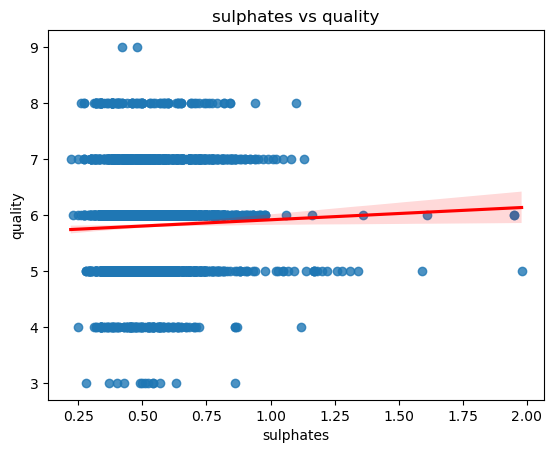

REJECT NULL HYPOTHESIS!
Feature: sulphates
Correlation: 0.0391
P-Value: 0.0185


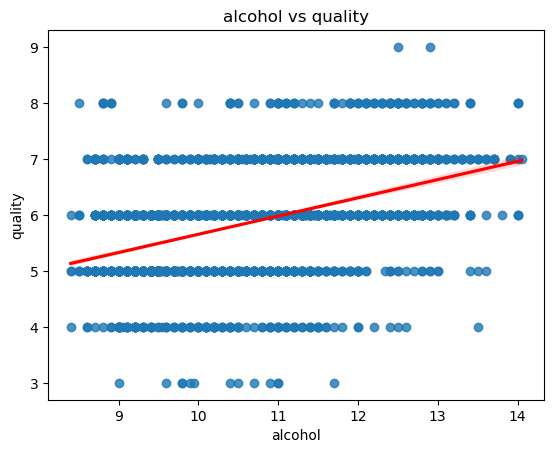

REJECT NULL HYPOTHESIS!
Feature: alcohol
Correlation: 0.4466
P-Value: 0.0000


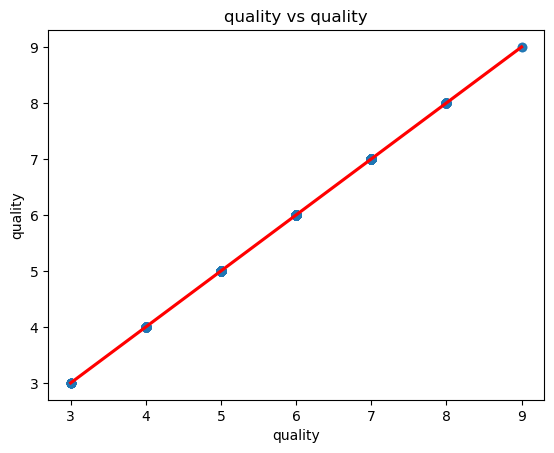

REJECT NULL HYPOTHESIS!
Feature: quality
Correlation: 1.0000
P-Value: 0.0000


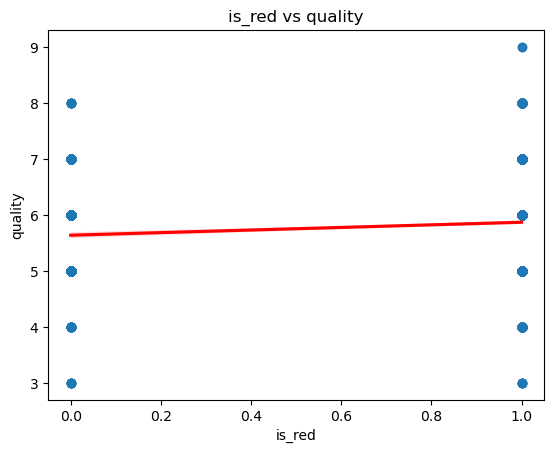

REJECT NULL HYPOTHESIS!
Feature: is_red
Correlation: 0.1148
P-Value: 0.0000


In [14]:
for col in cols:
    sns.regplot(data=train, x=col, y='quality', line_kws={'color':'red'})
    plt.title(f'{col} vs quality')
    plt.show()
    r, p = stats.spearmanr(train[col], train.quality)
    alpha = 0.05
    if p < alpha:
        print(f'\033[32mREJECT NULL HYPOTHESIS!\033[0m')
        print(f'\033[35mFeature:\033[0m {col}')
        print(f'\033[35mCorrelation:\033[0m {r:.4f}')
        print(f'\033[35mP-Value:\033[0m {p:.4f}')
    else:
        print(f'\033[31mACCEPT NULL HYPOTHESIS!\033[0m')
        print(f'\033[35mFeature:\033[0m {col}')
        print(f'\033[35mCorrelation:\033[0m {r:.4f}')
        print(f'\033[35mP-Value:\033[0m {p:.4f}')

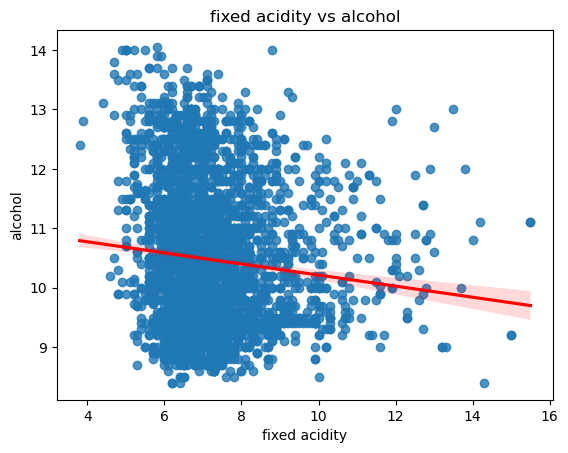

REJECT NULL HYPOTHESIS!
Feature: fixed acidity
Correlation: -0.0970
P-Value: 0.0000


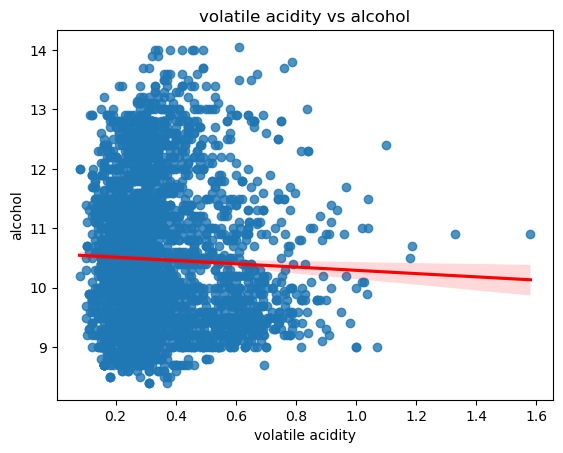

REJECT NULL HYPOTHESIS!
Feature: volatile acidity
Correlation: -0.2490
P-Value: 0.0000


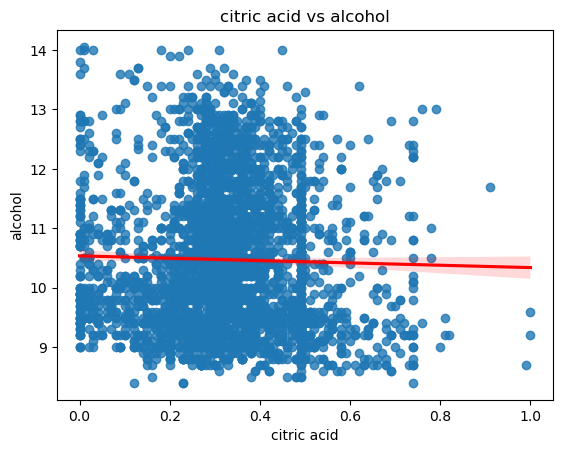

REJECT NULL HYPOTHESIS!
Feature: citric acid
Correlation: 0.0927
P-Value: 0.0000


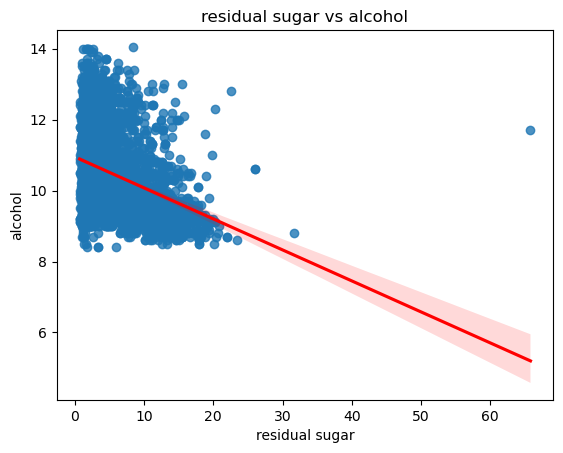

ACCEPT NULL HYPOTHESIS!
Feature: residual sugar
Correlation: -0.0278
P-Value: 0.0933


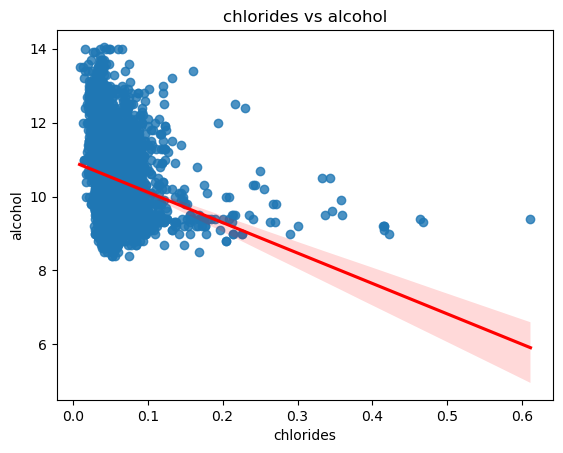

REJECT NULL HYPOTHESIS!
Feature: chlorides
Correlation: -0.2799
P-Value: 0.0000


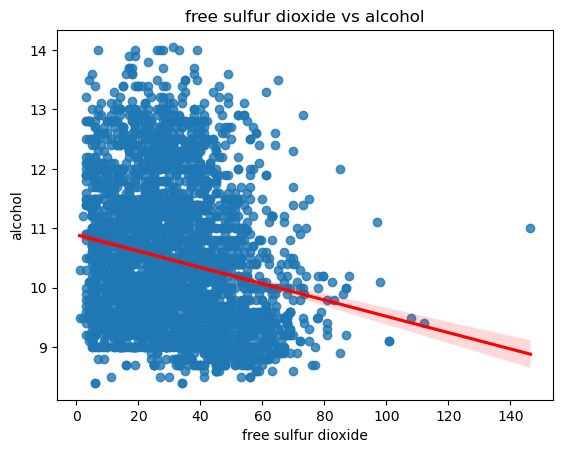

REJECT NULL HYPOTHESIS!
Feature: free sulfur dioxide
Correlation: 0.0600
P-Value: 0.0003


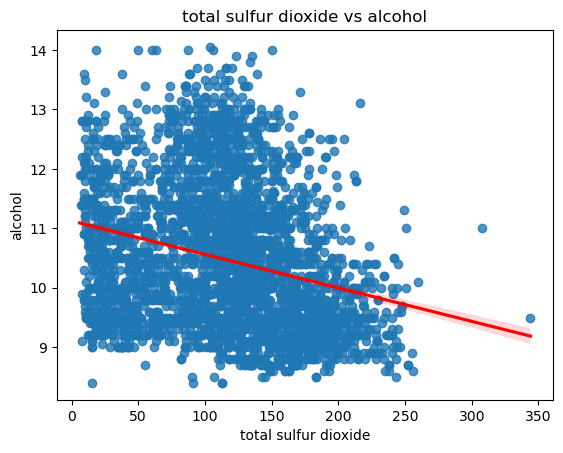

REJECT NULL HYPOTHESIS!
Feature: total sulfur dioxide
Correlation: -0.0703
P-Value: 0.0000


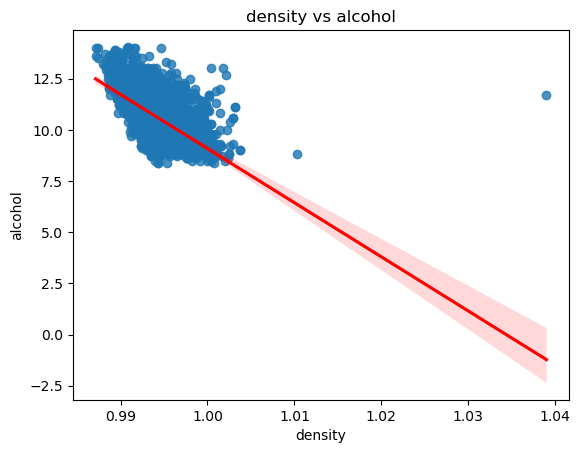

REJECT NULL HYPOTHESIS!
Feature: density
Correlation: -0.3246
P-Value: 0.0000


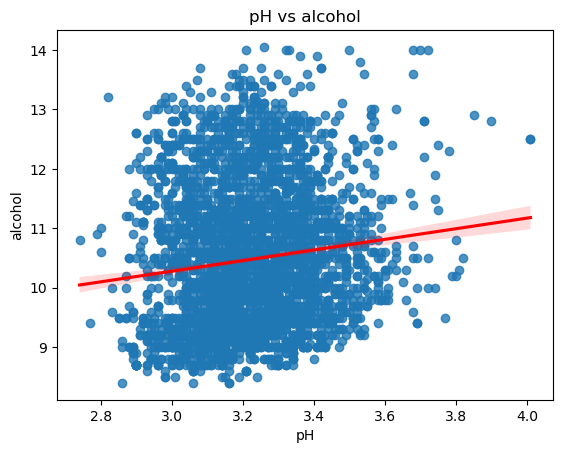

REJECT NULL HYPOTHESIS!
Feature: pH
Correlation: 0.0414
P-Value: 0.0125


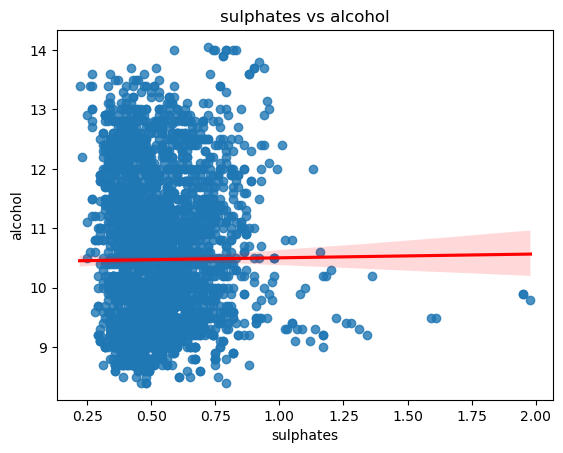

REJECT NULL HYPOTHESIS!
Feature: sulphates
Correlation: 0.0391
P-Value: 0.0185


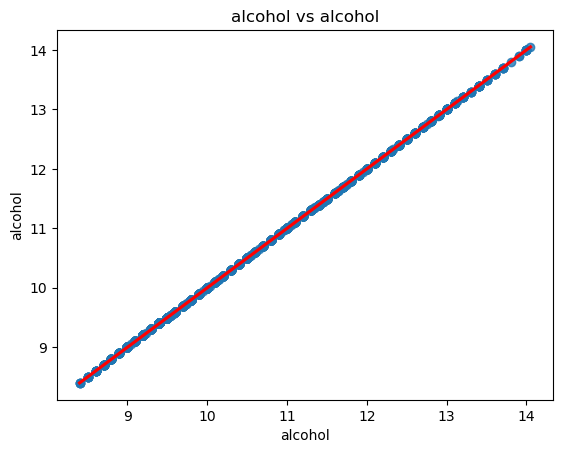

REJECT NULL HYPOTHESIS!
Feature: alcohol
Correlation: 0.4466
P-Value: 0.0000


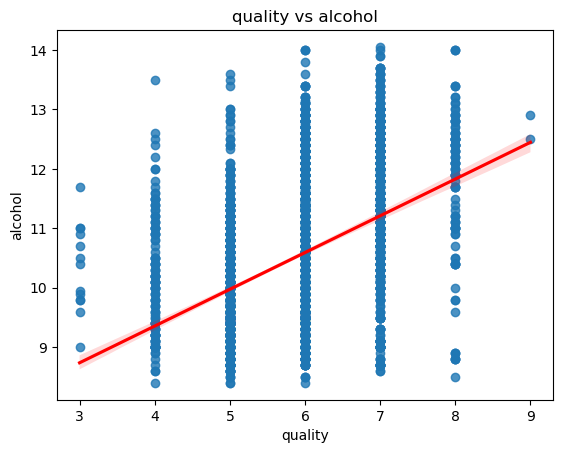

REJECT NULL HYPOTHESIS!
Feature: quality
Correlation: 1.0000
P-Value: 0.0000


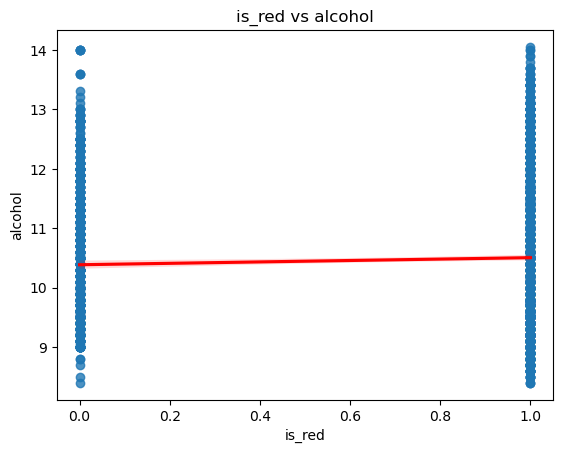

REJECT NULL HYPOTHESIS!
Feature: is_red
Correlation: 0.1148
P-Value: 0.0000


In [16]:
for col in cols:
    sns.regplot(data=train, x=col, y='alcohol', line_kws={'color':'red'})
    plt.title(f'{col} vs alcohol')
    plt.show()
    r, p = stats.spearmanr(train[col], train.quality)
    alpha = 0.05
    if p < alpha:
        print(f'\033[32mREJECT NULL HYPOTHESIS!\033[0m')
        print(f'\033[35mFeature:\033[0m {col}')
        print(f'\033[35mCorrelation:\033[0m {r:.4f}')
        print(f'\033[35mP-Value:\033[0m {p:.4f}')
    else:
        print(f'\033[31mACCEPT NULL HYPOTHESIS!\033[0m')
        print(f'\033[35mFeature:\033[0m {col}')
        print(f'\033[35mCorrelation:\033[0m {r:.4f}')
        print(f'\033[35mP-Value:\033[0m {p:.4f}')